In [4]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Acessando os Labels do Conjunto Treino:

In [18]:
file_train_labels = gzip.open('train-labels-idx1-ubyte.gz','r')

file_train_labels.read(8)

buf = file_train_labels.read(60000)

data = np.frombuffer(buf, dtype=np.uint8).astype(np.int32)

train_labels = data

In [6]:
# Pritando os labels do Conjunto Treino
train_labels

array([5, 0, 4, ..., 5, 6, 8])

# Acessando as Imagens do Conjunto Treino

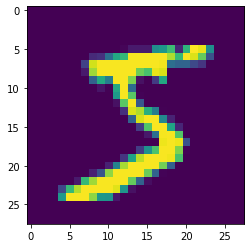

Foto 1



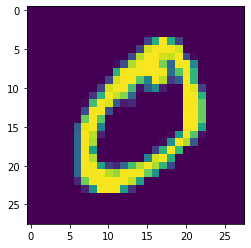

Foto 2



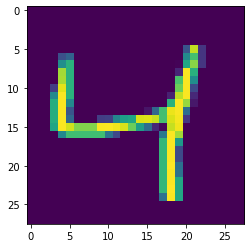

Foto 3



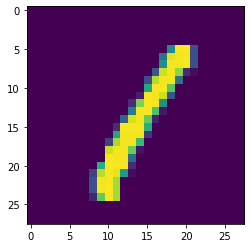

Foto 4



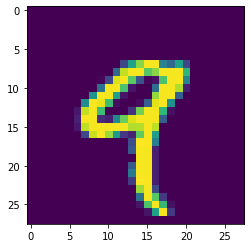

Foto 5



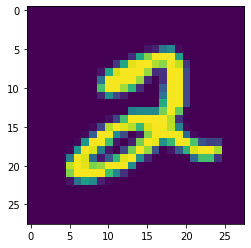

Foto 6



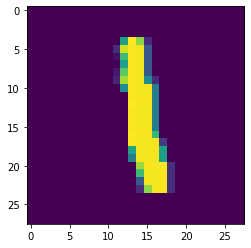

Foto 7



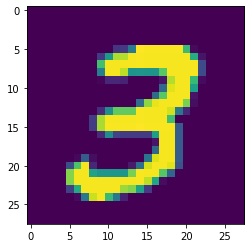

Foto 8



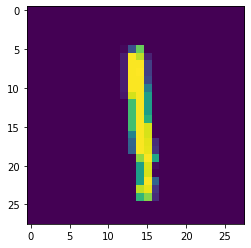

Foto 9



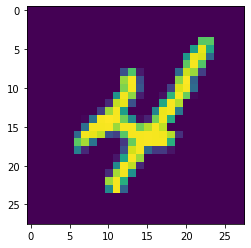

Foto 10



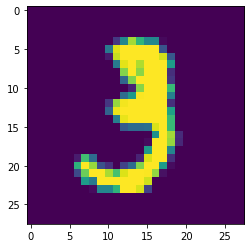

Foto 11



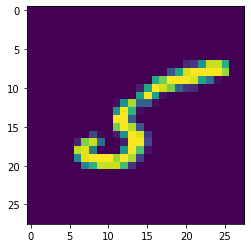

Foto 12



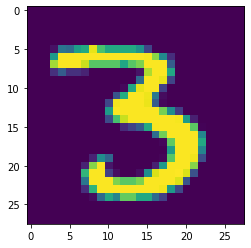

Foto 13



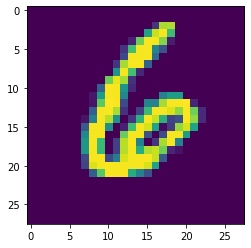

Foto 14



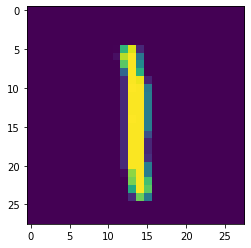

Foto 15



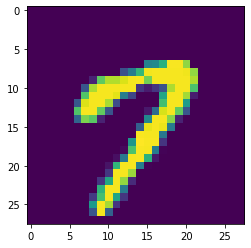

Foto 16



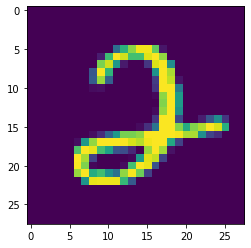

Foto 17



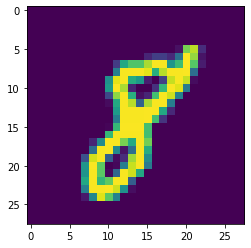

Foto 18



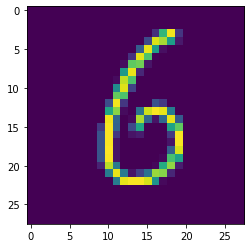

Foto 19



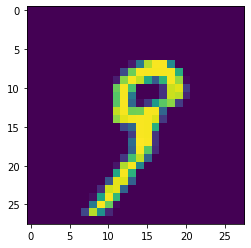

Foto 20



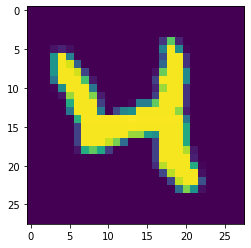

Foto 21



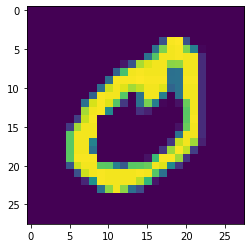

Foto 22



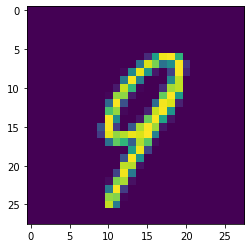

Foto 23



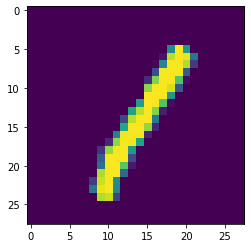

Foto 24



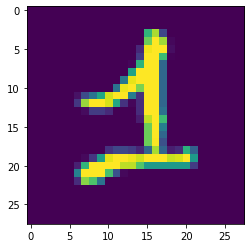

Foto 25



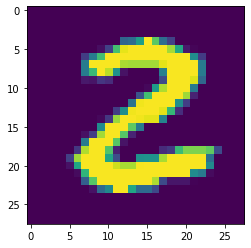

Foto 26



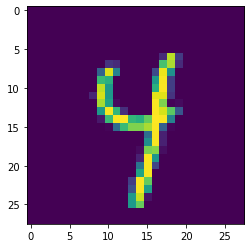

Foto 27



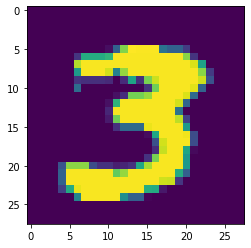

Foto 28



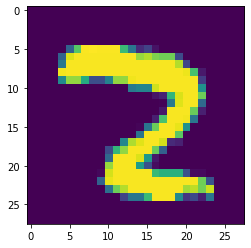

Foto 29



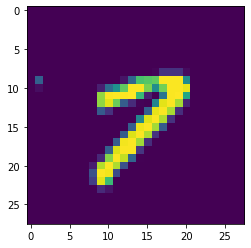

Foto 30



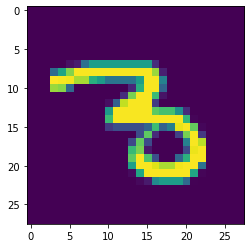

Foto 31



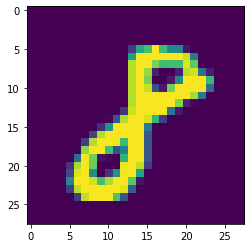

Foto 32



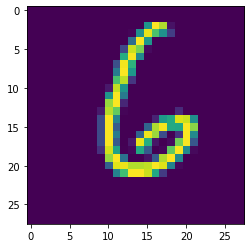

Foto 33



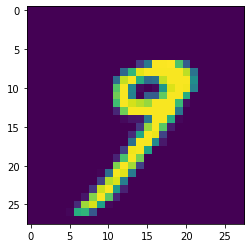

Foto 34



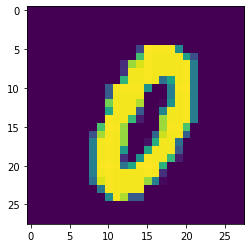

Foto 35



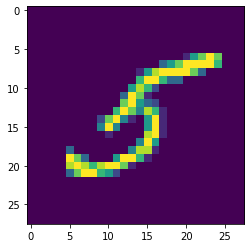

Foto 36



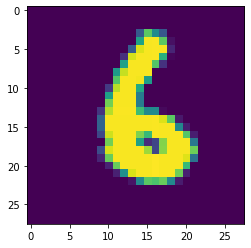

Foto 37



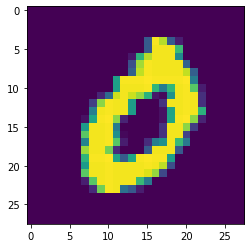

Foto 38



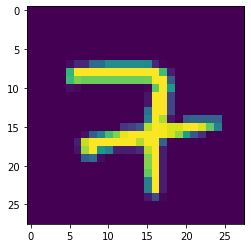

Foto 39



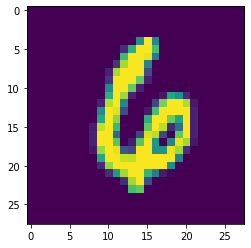

Foto 40



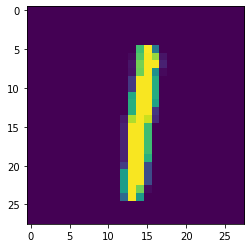

Foto 41



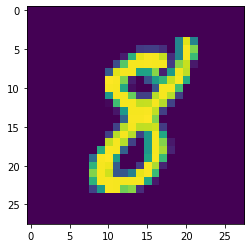

Foto 42



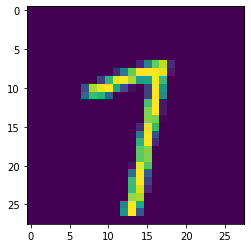

Foto 43



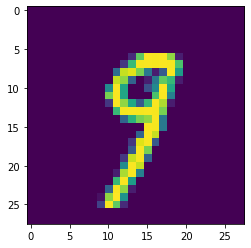

Foto 44



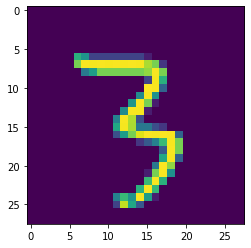

Foto 45



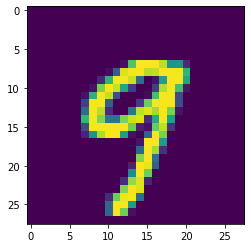

Foto 46



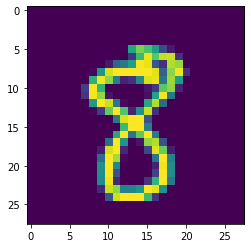

Foto 47



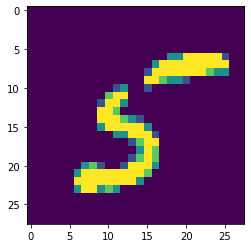

Foto 48



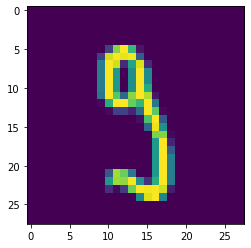

Foto 49



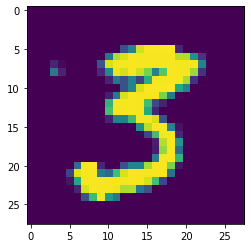

Foto 50



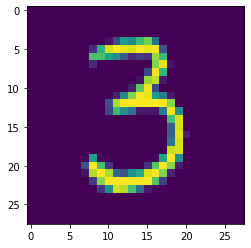

Foto 51



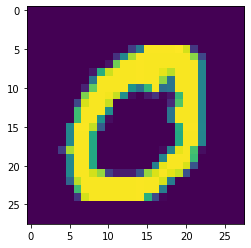

Foto 52



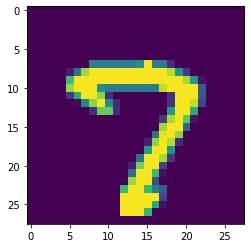

Foto 53



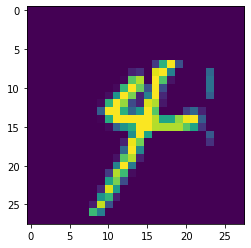

Foto 54



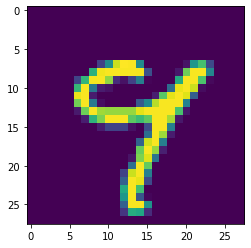

Foto 55



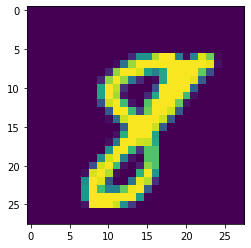

Foto 56



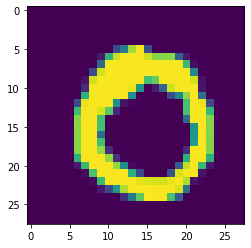

Foto 57



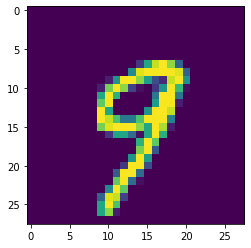

Foto 58



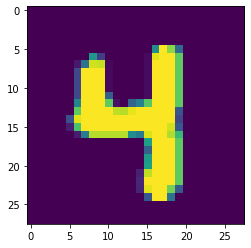

Foto 59



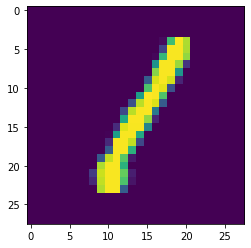

Foto 60



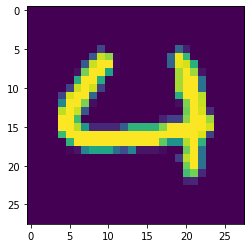

Foto 61



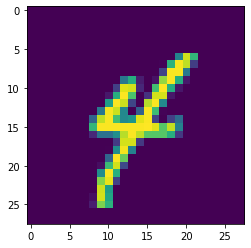

Foto 62



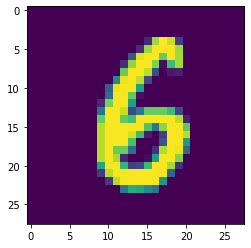

Foto 63



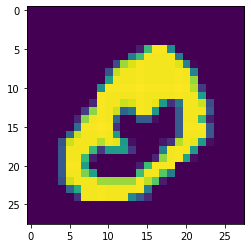

Foto 64



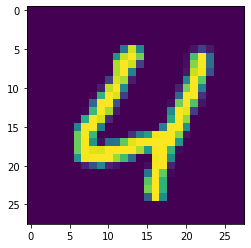

Foto 65



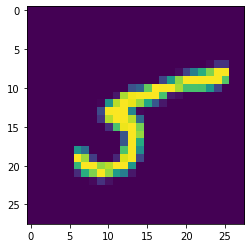

Foto 66



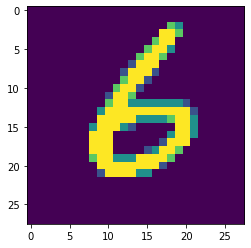

Foto 67



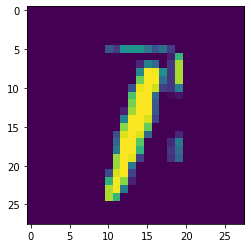

Foto 68



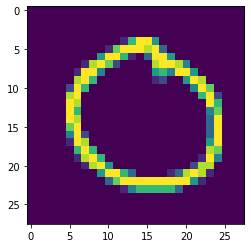

Foto 69



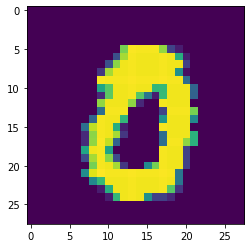

Foto 70



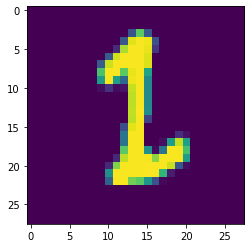

Foto 71



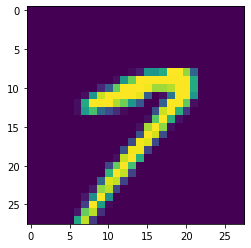

Foto 72



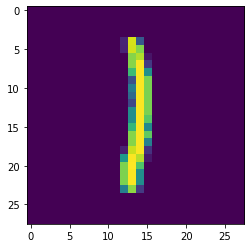

Foto 73



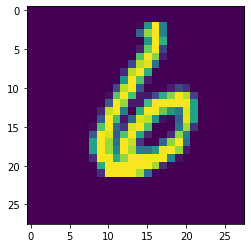

Foto 74



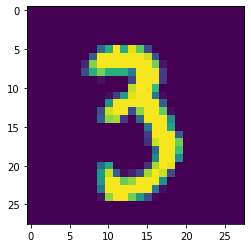

Foto 75



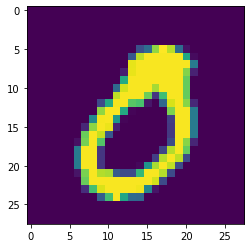

Foto 76



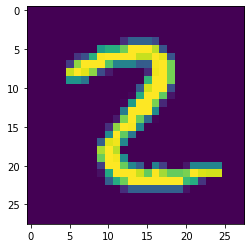

Foto 77



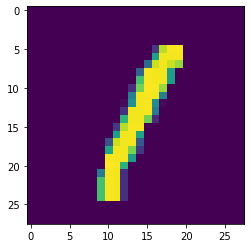

Foto 78



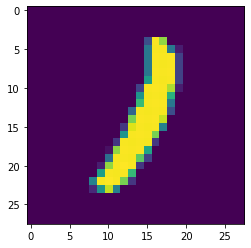

Foto 79



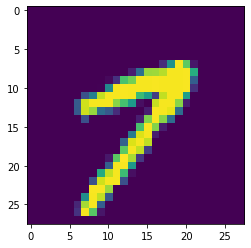

Foto 80



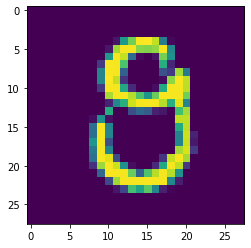

Foto 81



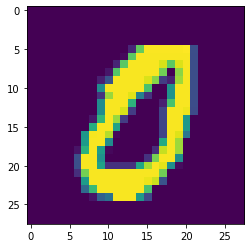

Foto 82



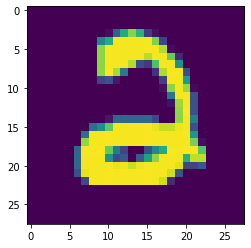

Foto 83



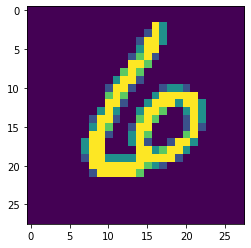

Foto 84



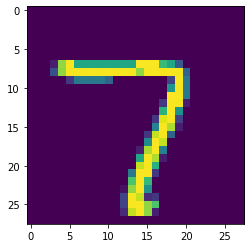

Foto 85



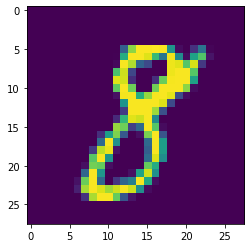

Foto 86



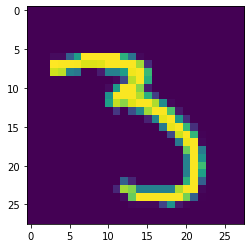

Foto 87



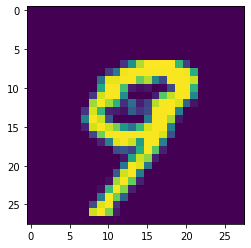

Foto 88



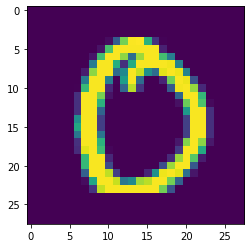

Foto 89



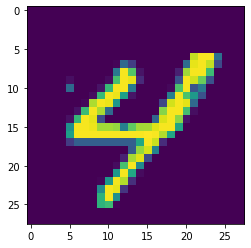

Foto 90



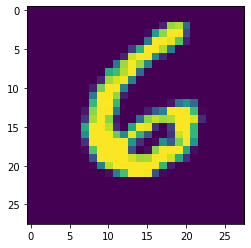

Foto 91



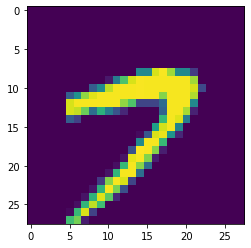

Foto 92



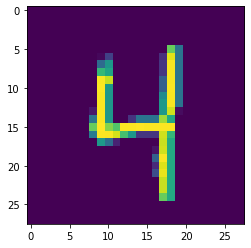

Foto 93



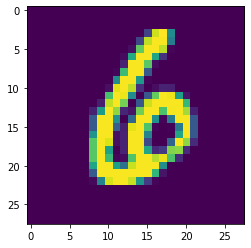

Foto 94



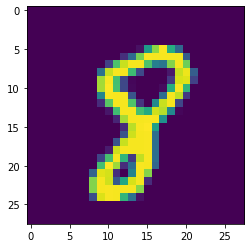

Foto 95



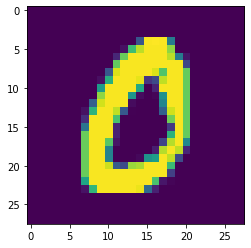

Foto 96



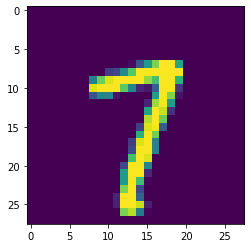

Foto 97



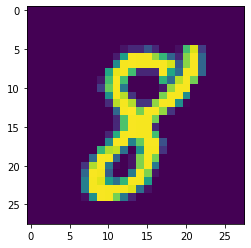

Foto 98



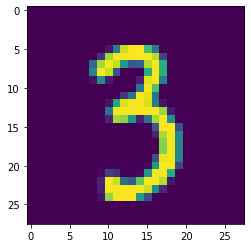

Foto 99



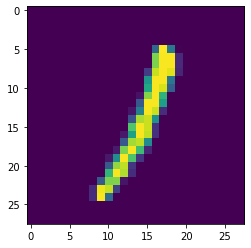

Foto 100



In [105]:
file_train_images = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 3000

file_train_images.read(16)

buf = file_train_images.read(image_size * image_size * num_images)

data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

train_images = data

for i in range(0, 100):
    plt.imshow(np.asarray(data[i]).squeeze())
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Tratando as imagens do Conjunto Treino:

In [106]:
# Criando matriz de dados Não-Centralizada

x = np.asarray(train_images).squeeze().reshape(num_images, 784)
x.shape

(3000, 784)

In [107]:
# Calculando media e centralizando dados
train_mean = np.mean(x, axis = 1)

X = (x.T - train_mean).T
X.shape

(3000, 784)

In [108]:
# Calculando Matriz de Cov
covx = np.cov(X)

In [109]:
covx.shape

(3000, 3000)

In [110]:
# Decomposição Espectral da CovX
V, Q = np.linalg.eig(covx)

In [111]:
V.shape

(3000,)

In [112]:
Q.shape

(3000, 3000)

In [113]:
# Calculando a matriz P
P = np.dot(X.T,Q)

In [162]:
# Estabelecendo numero de autovalores
autovalor_num = 780

In [163]:
# Criando a Matriz Final

In [164]:
X = np.dot(Q[:,:autovalor_num], P.T[:autovalor_num,:])

In [165]:
X.shape

(3000, 784)

In [166]:
# Retonando a media
X = (X.T + train_mean).T

In [167]:
X.shape

(3000, 784)

In [168]:
# Voltando ao formato imagem

In [169]:
image = X[1]

In [170]:
image.shape

(784,)

In [171]:
image = image.reshape((28, 28)).astype(np.float32)

<ipython-input-171-ad87aaa7e444>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  image = image.reshape((28, 28)).astype(np.float32)


In [172]:
image.shape

(28, 28)

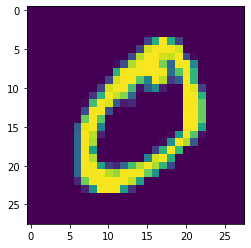

In [173]:
image = np.asarray(image)
plt.imshow(image)
plt.show()